# Mission and Use Case

Mission: To predict the risk score of birth defects such as Neural tube defects like spina bifida, Chromosomal abnormalities like Down syndrome, and Abdominal wall defects like omphalocele in pregnant women from Rwandan population and African populations in general using maternal health data, specifically focusing on Alpha-Fetoprotein (AFP) levels, which is an indicator of  demographic factors. This supports early identification of high-risk pregnancies to improve maternal and fetal outcomes.

Use Case: Develop a linear regression model to predict the Risk_score based on maternal health and demographic features from the provided dataset (Alpha-Fetoprotein and Birth Defect Risk Prediction with African Population Demographics).

# Step 1: Data Exploration and Visualization
The dataset contains maternal health data with features like Maternal_age, Gestational_age_weeks, afp_level_ng_ml, and others, with Risk_score as the target variable. Below are key visualizations to understand the data:

1. Distribution of Risk Score:
To understand the target variable's distribution, allow me to plot a histogram.

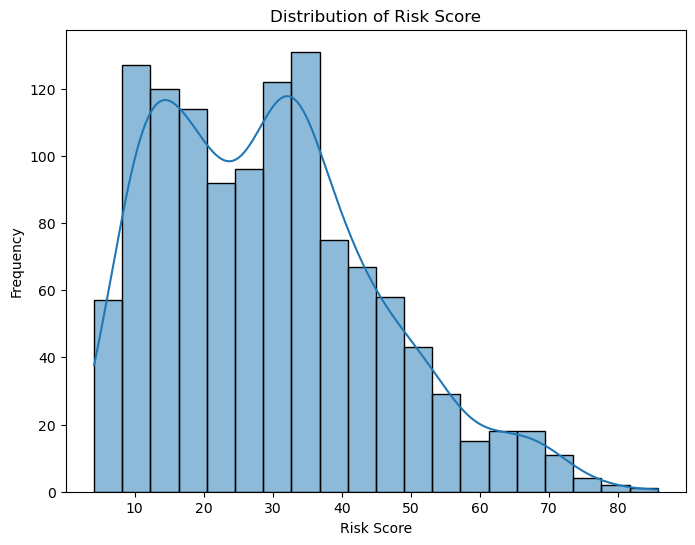

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Alpha-Fetoprotein and Birth Defect Risk Prediction with African Population Demographics (AAFP-BDR Dataset).csv')

# Histogram of Risk_score
plt.figure(figsize=(8, 6))
sns.histplot(df['Risk_score'], kde=True)
plt.title('Distribution of Risk Score')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Interprettion : 
??????????

2. Correlation Matrix:
To identify relationships between numeric features and Risk_score.

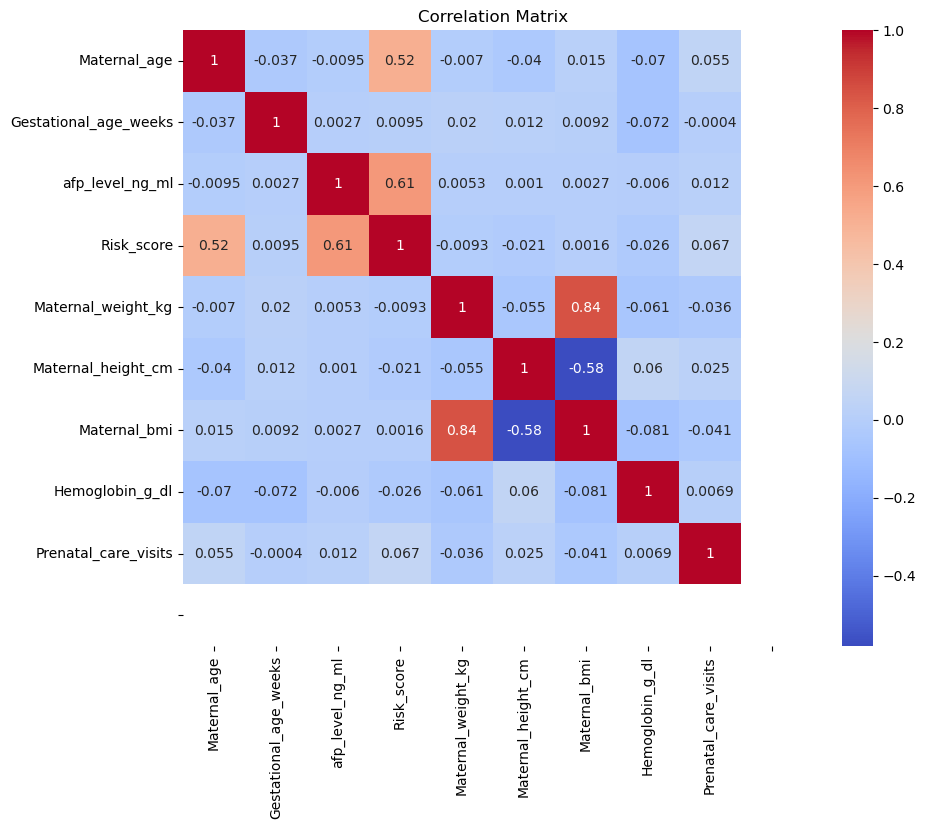

In [4]:
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Interpretation: Features like afp_level_ng_ml, Maternal_age, and Maternal_bmi may show strong correlations with Risk_score. High correlations indicate potential predictive power.

3. Scatter Plot of AFP Level vs. Risk Score:
To explore the relationship between afp_level_ng_ml and Risk_score.

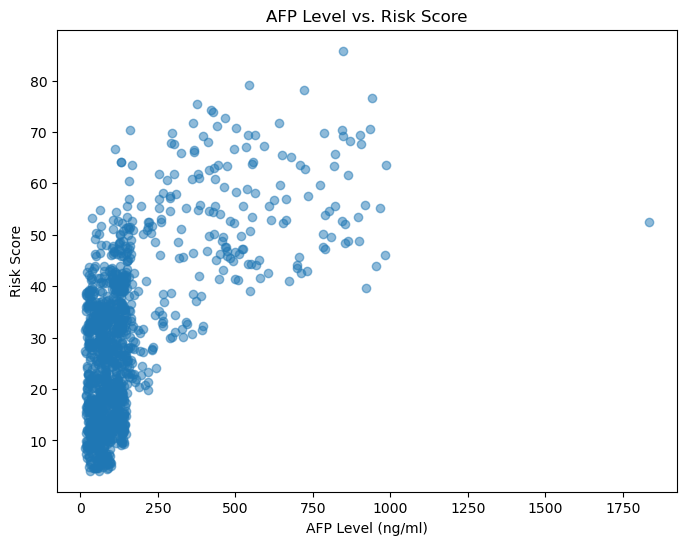

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(df['afp_level_ng_ml'], df['Risk_score'], alpha=0.5)
plt.title('AFP Level vs. Risk Score')
plt.xlabel('AFP Level (ng/ml)')
plt.ylabel('Risk Score')
plt.show()

Interpretation: If the scatter plot shows a linear trend, afp_level_ng_ml is likely a strong predictor. Outliers may need to be addressed.

# Step 2: Feature Engineering

1. Columns to Keep or Drop:

a. Keep: Maternal_age, Gestational_age_weeks, afp_level_ng_ml, Maternal_weight_kg, Maternal_height_cm, Maternal_bmi, Hemoglobin_g_dl, Prenatal_care_visits (numeric features with potential predictive power).

b. Drop: Patient_id (identifier, no predictive value), Country (string, requires encoding), Risk_category, Defect_type (categorical, may introduce noise unless encoded), Multiple_pregnancy, Previous_history_defects, Gestational_diabetes, Pregnancy_hypertension (binary, may be encoded if needed).

c. Reasoning: Numeric features are directly usable for linear regression. Categorical features like Country or Defect_type require encoding, but we prioritize simplicity and drop them unless they show strong predictive power.

2. Convert to Numeric:

Binary categorical columns (Multiple_pregnancy, Previous_history_defects, Gestational_diabetes, Pregnancy_hypertension) can be encoded as 0/1.

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Alpha-Fetoprotein and Birth Defect Risk Prediction with African Population Demographics (AAFP-BDR Dataset).csv')

# Convert categorical columns to numeric
df['Multiple_pregnancy'] = df['Multiple_pregnancy'].map({'No': 0, 'Yes': 1})
df['Gestational_diabetes'] = df['Gestational_diabetes'].map({'No': 0, 'Yes': 1})
df['Pregnancy_hypertension'] = df['Pregnancy_hypertension'].map({'No': 0, 'Yes': 1})
df['Previous_history_defects'] = df['Previous_history_defects'].map({'No': 0, 'Yes': 1})

# Verify the results
print("First 5 rows of the DataFrame:")
print(df.head())
print("\nUnique values after mapping:")
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    print(f"{col}: {df[col].unique()}")

First 5 rows of the DataFrame:
  Patient_id  Maternal_age  Gestational_age_weeks   Country  afp_level_ng_ml  \
0    AFP0001            42                     20  Tanzania             50.7   
1    AFP0002            21                     18     Ghana             70.0   
2    AFP0003            18                     19    Zambia             77.2   
3    AFP0004            50                     16     Kenya            288.6   
4    AFP0005            32                     17   Senegal            511.9   

   Risk_score Risk_category Defect_type  Multiple_pregnancy  \
0        50.3        Normal         NaN                   0   
1        14.4        Normal         NaN                   0   
2        21.9        Normal         NaN                   0   
3        54.7        Normal         NaN                   0   
4        46.3        Normal         NaN                   0   

   Previous_history_defects  Gestational_diabetes  Pregnancy_hypertension  \
0                         1     

3. Feature Selection:

Use features with high correlation to Risk_score (from the correlation matrix).
Drop features with low variance or multicollinearity (e.g., if Maternal_bmi is highly correlated with Maternal_weight_kg and Maternal_height_cm, we may keep only Maternal_bmi).

## Step 3: Data Preprocessing

1. Handle Missing Values

In [9]:
# Check for missing values
print(df.isnull().sum())
# If missing, impute with median for numeric columns
df.fillna(df.select_dtypes(include=['float64', 'int64']).median(), inplace=True)

Patient_id                     0
Maternal_age                   0
Gestational_age_weeks          0
Country                        0
afp_level_ng_ml                0
Risk_score                     0
Risk_category                  0
Defect_type                 1114
Multiple_pregnancy          1200
Previous_history_defects    1200
Gestational_diabetes        1200
Pregnancy_hypertension      1200
Maternal_weight_kg             0
Maternal_height_cm             0
Maternal_bmi                   0
Hemoglobin_g_dl                0
Prenatal_care_visits           0
                            1200
dtype: int64


2. Standardize Features: Standardize numeric features to have mean=0 and variance=1 for better model performance.

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Alpha-Fetoprotein and Birth Defect Risk Prediction with African Population Demographics (AAFP-BDR Dataset).csv')

# Check column names to ensure they match
print("Column names in dataset:")
print(df.columns.tolist())

# Check unique values in categorical columns before mapping
print("\nUnique values before mapping:")
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    print(f"{col}: {df[col].unique()}")

# Handle missing values and unexpected values
df.fillna({
    'Multiple_pregnancy': 'No',
    'Gestational_diabetes': 'No',
    'Pregnancy_hypertension': 'No',
    'Previous_history_defects': 'No'
}, inplace=True)

# Convert categorical columns to numeric
df['Multiple_pregnancy'] = df['Multiple_pregnancy'].map({'No': 0, 'Yes': 1})
df['Gestational_diabetes'] = df['Gestational_diabetes'].map({'No': 0, 'Yes': 1})
df['Pregnancy_hypertension'] = df['Pregnancy_hypertension'].map({'No': 0, 'Yes': 1})
df['Previous_history_defects'] = df['Previous_history_defects'].map({'No': 0, 'Yes': 1})

# Check for any unmapped values (should be [0, 1] or [0, 1, nan])
print("\nUnique values after mapping:")
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    print(f"{col}: {df[col].unique()}")

# Check for any remaining non-numeric values
if df[['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']].isna().any().any():
    print("\nWarning: Some categorical columns contain NaN after mapping. Filling with 0.")
    df[['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']] = df[['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']].fillna(0)

# Define features and target
features = [
    'Maternal_age', 'Gestational_age_weeks', 'afp_level_ng_ml', 'Maternal_bmi',
    'Hemoglobin_g_dl', 'Prenatal_care_visits', 'Multiple_pregnancy',
    'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects'
]
X = df[features]
y = df['Risk_score']

# Check for any non-numeric values in X
print("\nData types of features:")
print(X.dtypes)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verify the shape of scaled data
print("\nShape of X_scaled:", X_scaled.shape)
print("First few rows of X_scaled:\n", X_scaled[:5])

Column names in dataset:
['Patient_id', 'Maternal_age', 'Gestational_age_weeks', 'Country', 'afp_level_ng_ml', 'Risk_score', 'Risk_category', 'Defect_type', 'Multiple_pregnancy', 'Previous_history_defects', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Maternal_weight_kg', 'Maternal_height_cm', 'Maternal_bmi', 'Hemoglobin_g_dl', 'Prenatal_care_visits', '   ']

Unique values before mapping:
Multiple_pregnancy: ['No' 'Yes']
Gestational_diabetes: ['No' 'Yes']
Pregnancy_hypertension: ['No' 'Yes']
Previous_history_defects: ['Yes' 'No']

Unique values after mapping:
Multiple_pregnancy: [0 1]
Gestational_diabetes: [0 1]
Pregnancy_hypertension: [0 1]
Previous_history_defects: [1 0]

Data types of features:
Maternal_age                  int64
Gestational_age_weeks         int64
afp_level_ng_ml             float64
Maternal_bmi                float64
Hemoglobin_g_dl             float64
Prenatal_care_visits          int64
Multiple_pregnancy            int64
Gestational_diabetes          int64

3. Train-Test Split:

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('Alpha-Fetoprotein and Birth Defect Risk Prediction with African Population Demographics (AAFP-BDR Dataset).csv')

# Check column names to ensure they match
print("Column names in dataset:")
print(df.columns.tolist())

# Check unique values in categorical columns before mapping
print("\nUnique values before mapping:")
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    print(f"{col}: {df[col].unique()}")

# Handle missing values in categorical columns
df.fillna({
    'Multiple_pregnancy': 'No',
    'Gestational_diabetes': 'No',
    'Pregnancy_hypertension': 'No',
    'Previous_history_defects': 'No'
}, inplace=True)

# Convert categorical columns to numeric
df['Multiple_pregnancy'] = df['Multiple_pregnancy'].map({'No': 0, 'Yes': 1})
df['Gestational_diabetes'] = df['Gestational_diabetes'].map({'No': 0, 'Yes': 1})
df['Pregnancy_hypertension'] = df['Pregnancy_hypertension'].map({'No': 0, 'Yes': 1})
df['Previous_history_defects'] = df['Previous_history_defects'].map({'No': 0, 'Yes': 1})

# Check for unmapped values (e.g., NaN due to unexpected strings)
print("\nUnique values after mapping:")
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    print(f"{col}: {df[col].unique()}")

# Handle any remaining NaN in categorical columns
if df[['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']].isna().any().any():
    print("\nWarning: Some categorical columns contain NaN after mapping. Filling with 0.")
    df[['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']] = df[['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']].fillna(0)

# Define features and target
features = [
    'Maternal_age', 'Gestational_age_weeks', 'afp_level_ng_ml', 'Maternal_bmi',
    'Hemoglobin_g_dl', 'Prenatal_care_visits', 'Multiple_pregnancy',
    'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects'
]
X = df[features]
y = df['Risk_score']

# Handle missing values in numeric columns
print("\nMissing values in features:")
print(X.isna().sum())
X = X.fillna(X.median())

# Check data types to ensure all are numeric
print("\nData types of features:")
print(X.dtypes)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify the split
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\nFirst few rows of X_train:")
print(X_train[:5])
print("\nFirst few values of y_train:")
print(y_train.head())

Column names in dataset:
['Patient_id', 'Maternal_age', 'Gestational_age_weeks', 'Country', 'afp_level_ng_ml', 'Risk_score', 'Risk_category', 'Defect_type', 'Multiple_pregnancy', 'Previous_history_defects', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Maternal_weight_kg', 'Maternal_height_cm', 'Maternal_bmi', 'Hemoglobin_g_dl', 'Prenatal_care_visits', '   ']

Unique values before mapping:
Multiple_pregnancy: ['No' 'Yes']
Gestational_diabetes: ['No' 'Yes']
Pregnancy_hypertension: ['No' 'Yes']
Previous_history_defects: ['Yes' 'No']

Unique values after mapping:
Multiple_pregnancy: [0 1]
Gestational_diabetes: [0 1]
Pregnancy_hypertension: [0 1]
Previous_history_defects: [1 0]

Missing values in features:
Maternal_age                0
Gestational_age_weeks       0
afp_level_ng_ml             0
Maternal_bmi                0
Hemoglobin_g_dl             0
Prenatal_care_visits        0
Multiple_pregnancy          0
Gestational_diabetes        0
Pregnancy_hypertension      0
Previous_hist

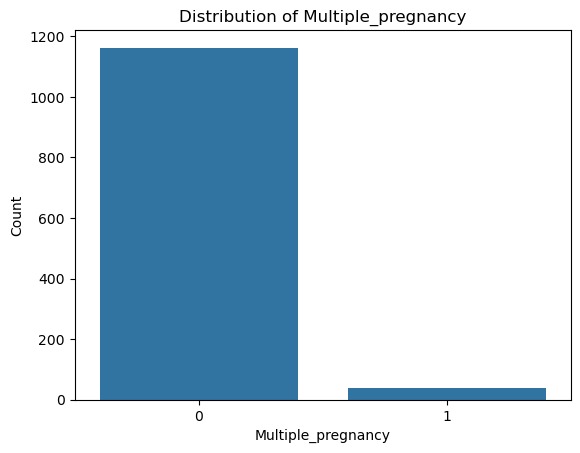

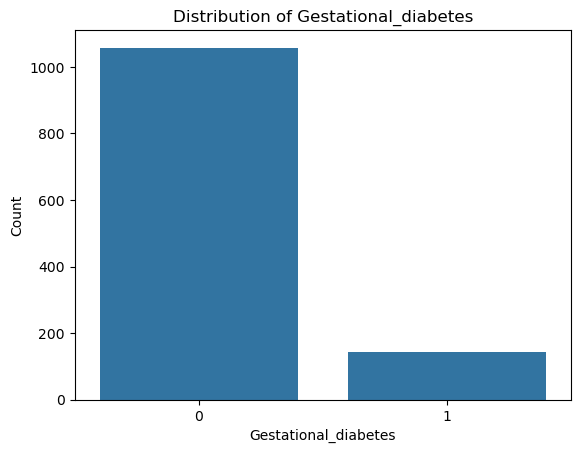

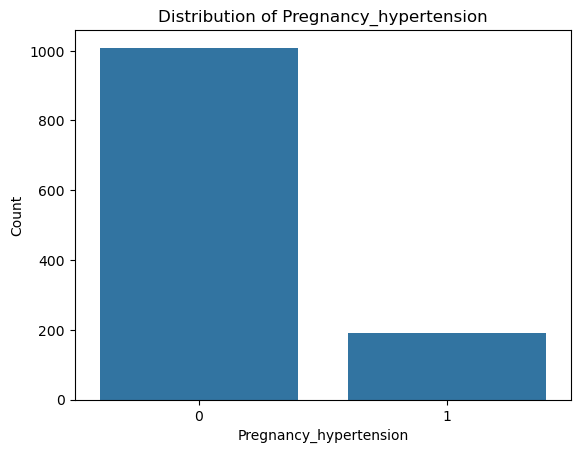

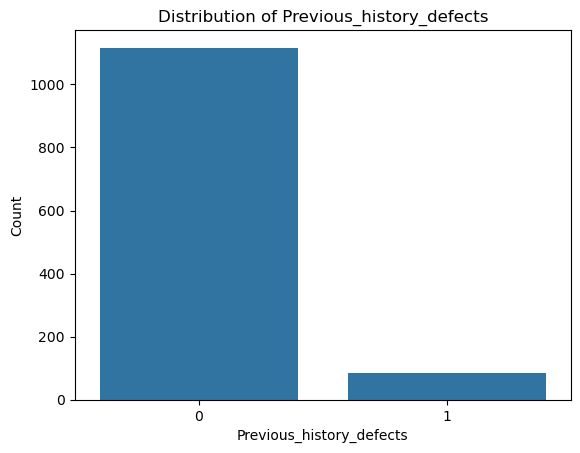

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Step 4: Linear Regression Model with Gradient Descent

1. Create and Train Model: Using scikit-learn’s LinearRegression, which internally uses gradient descent.

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('Alpha-Fetoprotein and Birth Defect Risk Prediction with African Population Demographics (AAFP-BDR Dataset).csv')

# Check column names to ensure they match
print("Column names in dataset:")
print(df.columns.tolist())

# Check for missing values in the entire dataset
print("\nMissing values in dataset:")
print(df.isna().sum())

# Define feature columns
features = [
    'Maternal_age', 'Gestational_age_weeks', 'afp_level_ng_ml', 'Maternal_bmi',
    'Hemoglobin_g_dl', 'Prenatal_care_visits', 'Multiple_pregnancy',
    'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects'
]

# Check unique values in categorical columns before mapping
print("\nUnique values in categorical columns before mapping:")
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    print(f"{col}: {df[col].unique()}")

# Handle missing and unexpected values in categorical columns
# Fill NaN with 'No' and convert to lowercase to handle case variations
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    df[col] = df[col].fillna('No').str.lower().map({'no': 0, 'yes': 1})
    if df[col].isna().any():
        print(f"\nWarning: {col} contains NaN after mapping. Filling with 0.")
        df[col] = df[col].fillna(0)

# Check unique values after mapping
print("\nUnique values in categorical columns after mapping:")
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    print(f"{col}: {df[col].unique()}")

# Select features and target, ensuring X is a copy to avoid SettingWithCopyWarning
X = df[features].copy()
y = df['Risk_score']

# Check for missing values in features
print("\nMissing values in features:")
print(X.isna().sum())

# Impute missing values in numeric columns with median
numeric_cols = ['Maternal_age', 'Gestational_age_weeks', 'afp_level_ng_ml', 'Maternal_bmi', 'Hemoglobin_g_dl', 'Prenatal_care_visits']
X.loc[:, numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# Verify no NaN remain in X
print("\nMissing values in X after imputation:")
print(X.isna().sum())

# Check data types to ensure all are numeric
print("\nData types of features:")
print(X.dtypes)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify the split
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Check for NaN in X_train and y_train
print("\nNaN in X_train:", np.isnan(X_train).sum())
print("NaN in y_train:", y_train.isna().sum())

# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Evaluate
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}')

# Save the model and scaler for the API
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(lr_model, 'best_model.pkl')

Column names in dataset:
['Patient_id', 'Maternal_age', 'Gestational_age_weeks', 'Country', 'afp_level_ng_ml', 'Risk_score', 'Risk_category', 'Defect_type', 'Multiple_pregnancy', 'Previous_history_defects', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Maternal_weight_kg', 'Maternal_height_cm', 'Maternal_bmi', 'Hemoglobin_g_dl', 'Prenatal_care_visits', '   ']

Missing values in dataset:
Patient_id                     0
Maternal_age                   0
Gestational_age_weeks          0
Country                        0
afp_level_ng_ml                0
Risk_score                     0
Risk_category                  0
Defect_type                 1114
Multiple_pregnancy             0
Previous_history_defects       0
Gestational_diabetes           0
Pregnancy_hypertension         0
Maternal_weight_kg             0
Maternal_height_cm             0
Maternal_bmi                   0
Hemoglobin_g_dl                0
Prenatal_care_visits           0
                            1200
dtype: int6

['best_model.pkl']

2. Plot Loss Curve: Simulate gradient descent loss curve by tracking MSE over iterations.

Column names in dataset:
['Patient_id', 'Maternal_age', 'Gestational_age_weeks', 'Country', 'afp_level_ng_ml', 'Risk_score', 'Risk_category', 'Defect_type', 'Multiple_pregnancy', 'Previous_history_defects', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Maternal_weight_kg', 'Maternal_height_cm', 'Maternal_bmi', 'Hemoglobin_g_dl', 'Prenatal_care_visits', '   ']

Missing values in dataset:
Patient_id                     0
Maternal_age                   0
Gestational_age_weeks          0
Country                        0
afp_level_ng_ml                0
Risk_score                     0
Risk_category                  0
Defect_type                 1114
Multiple_pregnancy             0
Previous_history_defects       0
Gestational_diabetes           0
Pregnancy_hypertension         0
Maternal_weight_kg             0
Maternal_height_cm             0
Maternal_bmi                   0
Hemoglobin_g_dl                0
Prenatal_care_visits           0
                            1200
dtype: int6

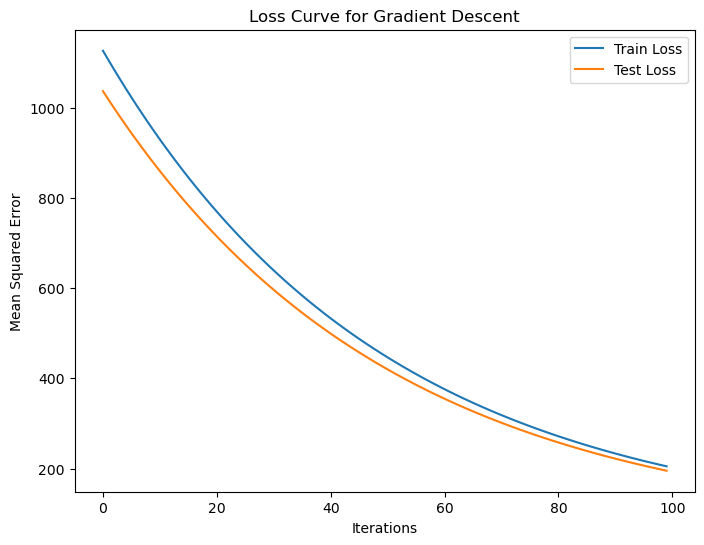


Scikit-learn Linear Regression - Train MSE: 62.16, Test MSE: 53.90


['best_model.pkl']

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Alpha-Fetoprotein and Birth Defect Risk Prediction with African Population Demographics (AAFP-BDR Dataset).csv')

# Check column names to ensure they match
print("Column names in dataset:")
print(df.columns.tolist())

# Check for missing values in the entire dataset
print("\nMissing values in dataset:")
print(df.isna().sum())

# Define feature columns
features = [
    'Maternal_age', 'Gestational_age_weeks', 'afp_level_ng_ml', 'Maternal_bmi',
    'Hemoglobin_g_dl', 'Prenatal_care_visits', 'Multiple_pregnancy',
    'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects'
]

# Check unique values in categorical columns before mapping
print("\nUnique values in categorical columns before mapping:")
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    print(f"{col}: {df[col].unique()}")

# Handle missing and unexpected values in categorical columns
# Fill NaN with 'No' and convert to lowercase to handle case variations
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    df[col] = df[col].fillna('No').str.lower().map({'no': 0, 'yes': 1})
    if df[col].isna().any():
        print(f"\nWarning: {col} contains NaN after mapping. Filling with 0.")
        df[col] = df[col].fillna(0)

# Check unique values after mapping
print("\nUnique values in categorical columns after mapping:")
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    print(f"{col}: {df[col].unique()}")

# Select features and target, ensuring X is a copy to avoid SettingWithCopyWarning
X = df[features].copy()
y = df['Risk_score'].copy()

# Check for missing values in features and target
print("\nMissing values in features:")
print(X.isna().sum())
print("Missing values in Risk_score:", y.isna().sum())

# Impute missing values in numeric columns with median
numeric_cols = ['Maternal_age', 'Gestational_age_weeks', 'afp_level_ng_ml', 'Maternal_bmi', 'Hemoglobin_g_dl', 'Prenatal_care_visits']
X.loc[:, numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# Impute missing values in target with median or drop rows
if y.isna().any():
    print("\nWarning: Risk_score contains NaN. Imputing with median.")
    y = y.fillna(y.median())
    # Alternatively, drop rows: df = df.dropna(subset=['Risk_score']); X = df[features].copy(); y = df['Risk_score']

# Verify no NaN remain in X and y
print("\nMissing values in X after imputation:")
print(X.isna().sum())
print("Missing values in y after imputation:", y.isna().sum())

# Check data types to ensure all are numeric
print("\nData types of features:")
print(X.dtypes)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify the split
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Check for NaN in X_train, X_test, y_train, y_test
print("\nNaN in X_train:", np.isnan(X_train).sum())
print("NaN in X_test:", np.isnan(X_test).sum())
print("NaN in y_train:", y_train.isna().sum())
print("NaN in y_test:", y_test.isna().sum())

# Custom gradient descent implementation
def gradient_descent(X, y, lr=0.01, iterations=100):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    train_losses = []
    test_losses = []

    for _ in range(iterations):
        y_pred = X.dot(weights) + bias
        train_loss = mean_squared_error(y, y_pred)
        train_losses.append(train_loss)

        # Compute gradients
        dw = (1/m) * X.T.dot(y_pred - y)
        db = (1/m) * np.sum(y_pred - y)

        # Update weights
        weights -= lr * dw
        bias -= lr * db

        # Test loss
        y_test_pred = X_test.dot(weights) + bias
        test_losses.append(mean_squared_error(y_test, y_test_pred))

    return train_losses, test_losses, weights, bias

# Run gradient descent
train_losses, test_losses, weights, bias = gradient_descent(X_train, y_train)

# Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss Curve for Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Compare with scikit-learn LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'\nScikit-learn Linear Regression - Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}')

# Save the model and scaler for the API
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(lr_model, 'best_model.pkl')

3. Scatter Plot with Regression Line: For a single feature (e.g., afp_level_ng_ml) to visualize the fit.

Column names in dataset:
['Patient_id', 'Maternal_age', 'Gestational_age_weeks', 'Country', 'afp_level_ng_ml', 'Risk_score', 'Risk_category', 'Defect_type', 'Multiple_pregnancy', 'Previous_history_defects', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Maternal_weight_kg', 'Maternal_height_cm', 'Maternal_bmi', 'Hemoglobin_g_dl', 'Prenatal_care_visits', '   ']

Missing values in dataset:
Patient_id                     0
Maternal_age                   0
Gestational_age_weeks          0
Country                        0
afp_level_ng_ml                0
Risk_score                     0
Risk_category                  0
Defect_type                 1114
Multiple_pregnancy             0
Previous_history_defects       0
Gestational_diabetes           0
Pregnancy_hypertension         0
Maternal_weight_kg             0
Maternal_height_cm             0
Maternal_bmi                   0
Hemoglobin_g_dl                0
Prenatal_care_visits           0
                            1200
dtype: int6

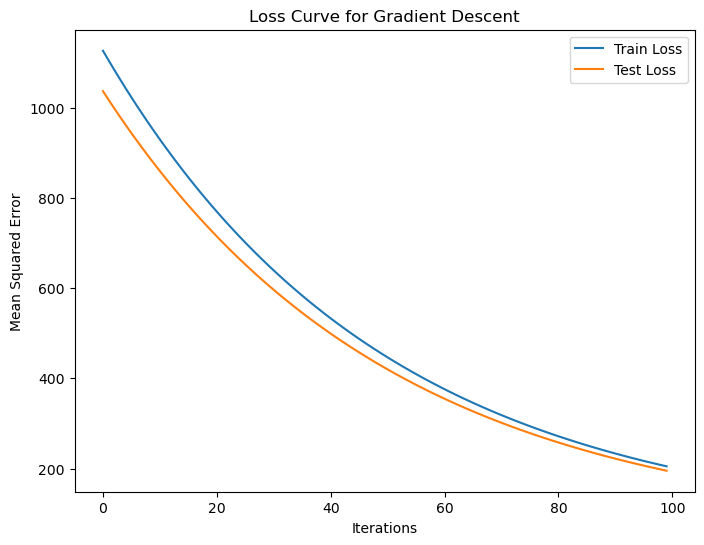

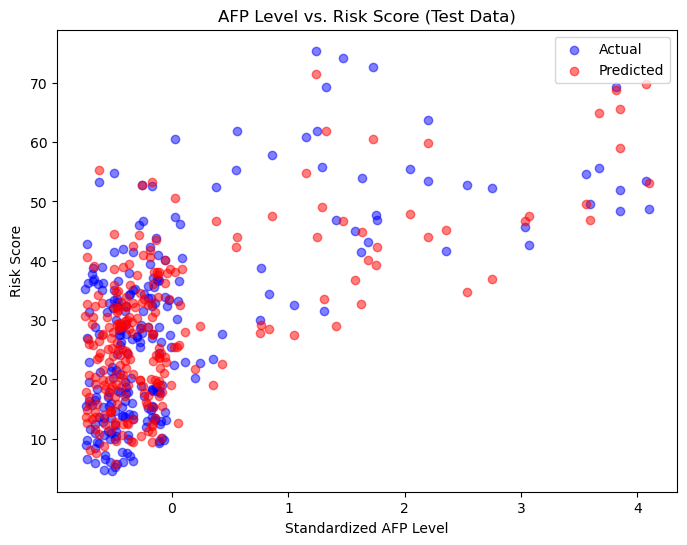

['best_model.pkl']

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Alpha-Fetoprotein and Birth Defect Risk Prediction with African Population Demographics (AAFP-BDR Dataset).csv')

# Check column names to ensure they match
print("Column names in dataset:")
print(df.columns.tolist())

# Check for missing values in the entire dataset
print("\nMissing values in dataset:")
print(df.isna().sum())

# Define feature columns
features = [
    'Maternal_age', 'Gestational_age_weeks', 'afp_level_ng_ml', 'Maternal_bmi',
    'Hemoglobin_g_dl', 'Prenatal_care_visits', 'Multiple_pregnancy',
    'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects'
]

# Check unique values in categorical columns before mapping
print("\nUnique values in categorical columns before mapping:")
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    print(f"{col}: {df[col].unique()}")

# Handle missing and unexpected values in categorical columns
# Fill NaN with 'No' and convert to lowercase to handle case variations
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    df[col] = df[col].fillna('No').str.lower().map({'no': 0, 'yes': 1})
    if df[col].isna().any():
        print(f"\nWarning: {col} contains NaN after mapping. Filling with 0.")
        df[col] = df[col].fillna(0)

# Check unique values after mapping
print("\nUnique values in categorical columns after mapping:")
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    print(f"{col}: {df[col].unique()}")

# Select features and target, ensuring X is a copy to avoid SettingWithCopyWarning
X = df[features].copy()
y = df['Risk_score'].copy()

# Check for missing values in features and target
print("\nMissing values in features:")
print(X.isna().sum())
print("Missing values in Risk_score:", y.isna().sum())

# Impute missing values in numeric columns with median
numeric_cols = ['Maternal_age', 'Gestational_age_weeks', 'afp_level_ng_ml', 'Maternal_bmi', 'Hemoglobin_g_dl', 'Prenatal_care_visits']
X.loc[:, numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# Impute missing values in target with median or drop rows
if y.isna().any():
    print("\nWarning: Risk_score contains NaN. Imputing with median.")
    y = y.fillna(y.median())
    # Alternatively, drop rows: df = df.dropna(subset=['Risk_score']); X = df[features].copy(); y = df['Risk_score']

# Verify no NaN remain in X and y
print("\nMissing values in X after imputation:")
print(X.isna().sum())
print("Missing values in y after imputation:", y.isna().sum())

# Check data types to ensure all are numeric
print("\nData types of features:")
print(X.dtypes)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify the split
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Check for NaN in X_train, X_test, y_train, y_test
print("\nNaN in X_train:", np.isnan(X_train).sum())
print("NaN in X_test:", np.isnan(X_test).sum())
print("NaN in y_train:", y_train.isna().sum())
print("NaN in y_test:", y_test.isna().sum())

# Custom gradient descent implementation
def gradient_descent(X, y, lr=0.01, iterations=100):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    train_losses = []
    test_losses = []

    for _ in range(iterations):
        y_pred = X.dot(weights) + bias
        train_loss = mean_squared_error(y, y_pred)
        train_losses.append(train_loss)

        # Compute gradients
        dw = (1/m) * X.T.dot(y_pred - y)
        db = (1/m) * np.sum(y_pred - y)

        # Update weights
        weights -= lr * dw
        bias -= lr * db

        # Test loss
        y_test_pred = X_test.dot(weights) + bias
        test_losses.append(mean_squared_error(y_test, y_test_pred))

    return train_losses, test_losses, weights, bias

# Run gradient descent
train_losses, test_losses, weights, bias = gradient_descent(X_train, y_train, lr=0.01, iterations=100)

# Generate predictions using gradient descent
y_train_pred_gd = X_train.dot(weights) + bias
y_test_pred_gd = X_test.dot(weights) + bias

# Train scikit-learn LinearRegression for comparison
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Evaluate both models
train_mse_gd = mean_squared_error(y_train, y_train_pred_gd)
test_mse_gd = mean_squared_error(y_test, y_test_pred_gd)
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)
print(f'\nGradient Descent - Train MSE: {train_mse_gd:.2f}, Test MSE: {test_mse_gd:.2f}')
print(f'Scikit-learn Linear Regression - Train MSE: {train_mse_lr:.2f}, Test MSE: {test_mse_lr:.2f}')

# Plot loss curves for gradient descent
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss Curve for Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Plot scatter plot for AFP Level vs. Risk Score (using LinearRegression predictions)
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 2], y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test[:, 2], y_test_pred_lr, color='red', label='Predicted', alpha=0.5)
plt.title('AFP Level vs. Risk Score (Test Data)')
plt.xlabel('Standardized AFP Level')
plt.ylabel('Risk Score')
plt.legend()
plt.show()

# Save the model and scaler for the API
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(lr_model, 'best_model.pkl')

# Step 5: Compare Models

1. Decision Tree and Random Forest:

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Alpha-Fetoprotein and Birth Defect Risk Prediction with African Population Demographics (AAFP-BDR Dataset).csv')

# Check column names to ensure they match
print("Column names in dataset:")
print(df.columns.tolist())

# Check for missing values in the entire dataset
print("\nMissing values in dataset:")
print(df.isna().sum())

# Define feature columns
features = [
    'Maternal_age', 'Gestational_age_weeks', 'afp_level_ng_ml', 'Maternal_bmi',
    'Hemoglobin_g_dl', 'Prenatal_care_visits', 'Multiple_pregnancy',
    'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects'
]

# Check unique values in categorical columns before mapping
print("\nUnique values in categorical columns before mapping:")
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    print(f"{col}: {df[col].unique()}")

# Handle missing and unexpected values in categorical columns
# Fill NaN with 'No' and convert to lowercase to handle case variations
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    df[col] = df[col].fillna('No').str.lower().map({'no': 0, 'yes': 1})
    if df[col].isna().any():
        print(f"\nWarning: {col} contains NaN after mapping. Filling with 0.")
        df[col] = df[col].fillna(0)

# Check unique values after mapping
print("\nUnique values in categorical columns after mapping:")
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    print(f"{col}: {df[col].unique()}")

# Select features and target, ensuring X is a copy to avoid SettingWithCopyWarning
X = df[features].copy()
y = df['Risk_score'].copy()

# Check for missing values in features and target
print("\nMissing values in features:")
print(X.isna().sum())
print("Missing values in Risk_score:", y.isna().sum())

# Impute missing values in numeric columns with median
numeric_cols = ['Maternal_age', 'Gestational_age_weeks', 'afp_level_ng_ml', 'Maternal_bmi', 'Hemoglobin_g_dl', 'Prenatal_care_visits']
X.loc[:, numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# Impute missing values in target with median or drop rows
if y.isna().any():
    print("\nWarning: Risk_score contains NaN. Imputing with median.")
    y = y.fillna(y.median())
    # Alternatively, drop rows: df = df.dropna(subset=['Risk_score']); X = df[features].copy(); y = df['Risk_score']

# Verify no NaN remain in X and y
print("\nMissing values in X after imputation:")
print(X.isna().sum())
print("Missing values in y after imputation:", y.isna().sum())

# Check data types to ensure all are numeric
print("\nData types of features:")
print(X.dtypes)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify the split
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Check for NaN in X_train, X_test, y_train, y_test
print("\nNaN in X_train:", np.isnan(X_train).sum())
print("NaN in X_test:", np.isnan(X_test).sum())
print("NaN in y_train:", y_train.isna().sum())
print("NaN in y_test:", y_test.isna().sum())

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)

# Train Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_train_pred)
dt_test_mse = mean_squared_error(y_test, dt_test_pred)

# Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)

# Print MSE for all models
print(f'\nLinear Regression - Train MSE: {train_mse_lr:.2f}, Test MSE: {test_mse_lr:.2f}')
print(f'Decision Tree - Train MSE: {dt_train_mse:.2f}, Test MSE: {dt_test_mse:.2f}')
print(f'Random Forest - Train MSE: {rf_train_mse:.2f}, Test MSE: {rf_test_mse:.2f}')

# Save the model and scaler for the API
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(lr_model, 'best_model.pkl')

Column names in dataset:
['Patient_id', 'Maternal_age', 'Gestational_age_weeks', 'Country', 'afp_level_ng_ml', 'Risk_score', 'Risk_category', 'Defect_type', 'Multiple_pregnancy', 'Previous_history_defects', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Maternal_weight_kg', 'Maternal_height_cm', 'Maternal_bmi', 'Hemoglobin_g_dl', 'Prenatal_care_visits', '   ']

Missing values in dataset:
Patient_id                     0
Maternal_age                   0
Gestational_age_weeks          0
Country                        0
afp_level_ng_ml                0
Risk_score                     0
Risk_category                  0
Defect_type                 1114
Multiple_pregnancy             0
Previous_history_defects       0
Gestational_diabetes           0
Pregnancy_hypertension         0
Maternal_weight_kg             0
Maternal_height_cm             0
Maternal_bmi                   0
Hemoglobin_g_dl                0
Prenatal_care_visits           0
                            1200
dtype: int6

['best_model.pkl']

2. Model Selection:

Linear Regression: Assumes linear relationships, may underfit if relationships are non-linear.

Decision Tree: Captures non-linear relationships but may overfit.
    
Random Forest: Reduces overfitting compared to Decision Tree, likely performs best due to ensemble nature.

Choice: Select the model with the lowest test MSE, likely Random Forest.

3. Save Best Model

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib
import os

# Load the dataset
df = pd.read_csv('Alpha-Fetoprotein and Birth Defect Risk Prediction with African Population Demographics (AAFP-BDR Dataset).csv')

# Check column names to ensure they match
print("Column names in dataset:")
print(df.columns.tolist())

# Check for missing values in the entire dataset
print("\nMissing values in dataset:")
print(df.isna().sum())

# Define feature columns
features = [
    'Maternal_age', 'Gestational_age_weeks', 'afp_level_ng_ml', 'Maternal_bmi',
    'Hemoglobin_g_dl', 'Prenatal_care_visits', 'Multiple_pregnancy',
    'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects'
]

# Check unique values in categorical columns before mapping
print("\nUnique values in categorical columns before mapping:")
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    print(f"{col}: {df[col].unique()}")

# Handle missing and unexpected values in categorical columns
# Fill NaN with 'No' and convert to lowercase to handle case variations
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    df[col] = df[col].fillna('No').str.lower().map({'no': 0, 'yes': 1})
    if df[col].isna().any():
        print(f"\nWarning: {col} contains NaN after mapping. Filling with 0.")
        df[col] = df[col].fillna(0)

# Check unique values after mapping
print("\nUnique values in categorical columns after mapping:")
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    print(f"{col}: {df[col].unique()}")

# Select features and target, ensuring X is a copy to avoid SettingWithCopyWarning
X = df[features].copy()
y = df['Risk_score'].copy()

# Check for missing values in features and target
print("\nMissing values in features:")
print(X.isna().sum())
print("Missing values in Risk_score:", y.isna().sum())

# Impute missing values in numeric columns with median
numeric_cols = ['Maternal_age', 'Gestational_age_weeks', 'afp_level_ng_ml', 'Maternal_bmi', 'Hemoglobin_g_dl', 'Prenatal_care_visits']
X.loc[:, numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# Impute missing values in target with median or drop rows
if y.isna().any():
    print("\nWarning: Risk_score contains NaN. Imputing with median.")
    y = y.fillna(y.median())
    # Alternatively, drop rows: df = df.dropna(subset=['Risk_score']); X = df[features].copy(); y = df['Risk_score']

# Verify no NaN remain in X and y
print("\nMissing values in X after imputation:")
print(X.isna().sum())
print("Missing values in y after imputation:", y.isna().sum())

# Check data types to ensure all are numeric
print("\nData types of features:")
print(X.dtypes)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify the split
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Check for NaN in X_train, X_test, y_train, y_test
print("\nNaN in X_train:", np.isnan(X_train).sum())
print("NaN in X_test:", np.isnan(X_test).sum())
print("NaN in y_train:", y_train.isna().sum())
print("NaN in y_test:", y_test.isna().sum())

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)

# Train Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_train_pred)
dt_test_mse = mean_squared_error(y_test, dt_test_pred)

# Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)

# Print MSE for all models
print(f'\nLinear Regression - Train MSE: {train_mse_lr:.2f}, Test MSE: {test_mse_lr:.2f}')
print(f'Decision Tree - Train MSE: {dt_train_mse:.2f}, Test MSE: {dt_test_mse:.2f}')
print(f'Random Forest - Train MSE: {rf_train_mse:.2f}, Test MSE: {rf_test_mse:.2f}')

# Save the best model (Random Forest) and scaler
best_model = rf_model  # Assuming Random Forest performs best
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Verify that the files were created
print("\nChecking saved files:")
if os.path.exists('best_model.pkl'):
    print("best_model.pkl was successfully created.")
else:
    print("Error: best_model.pkl was not created.")
if os.path.exists('scaler.pkl'):
    print("scaler.pkl was successfully created.")
else:
    print("Error: scaler.pkl was not created.")

Column names in dataset:
['Patient_id', 'Maternal_age', 'Gestational_age_weeks', 'Country', 'afp_level_ng_ml', 'Risk_score', 'Risk_category', 'Defect_type', 'Multiple_pregnancy', 'Previous_history_defects', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Maternal_weight_kg', 'Maternal_height_cm', 'Maternal_bmi', 'Hemoglobin_g_dl', 'Prenatal_care_visits', '   ']

Missing values in dataset:
Patient_id                     0
Maternal_age                   0
Gestational_age_weeks          0
Country                        0
afp_level_ng_ml                0
Risk_score                     0
Risk_category                  0
Defect_type                 1114
Multiple_pregnancy             0
Previous_history_defects       0
Gestational_diabetes           0
Pregnancy_hypertension         0
Maternal_weight_kg             0
Maternal_height_cm             0
Maternal_bmi                   0
Hemoglobin_g_dl                0
Prenatal_care_visits           0
                            1200
dtype: int6

4. Prediction Function:

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib
import os

# Load the dataset
df = pd.read_csv('Alpha-Fetoprotein and Birth Defect Risk Prediction with African Population Demographics (AAFP-BDR Dataset).csv')

# Check column names
print("Column names in dataset:")
print(df.columns.tolist())

# Check for missing values
print("\nMissing values in dataset:")
print(df.isna().sum())

# Define feature columns
features = [
    'Maternal_age', 'Gestational_age_weeks', 'afp_level_ng_ml', 'Maternal_bmi',
    'Hemoglobin_g_dl', 'Prenatal_care_visits', 'Multiple_pregnancy',
    'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects'
]

# Check unique values in categorical columns
print("\nUnique values in categorical columns before mapping:")
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    print(f"{col}: {df[col].unique()}")

# Handle missing and unexpected values in categorical columns
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    df[col] = df[col].fillna('No').str.lower().map({'no': 0, 'yes': 1})
    if df[col].isna().any():
        print(f"\nWarning: {col} contains NaN after mapping. Filling with 0.")
        df[col] = df[col].fillna(0)

# Check unique values after mapping
print("\nUnique values in categorical columns after mapping:")
for col in ['Multiple_pregnancy', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Previous_history_defects']:
    print(f"{col}: {df[col].unique()}")

# Select features and target
X = df[features].copy()
y = df['Risk_score'].copy()

# Check for missing values
print("\nMissing values in features:")
print(X.isna().sum())
print("Missing values in Risk_score:", y.isna().sum())

# Impute missing values in numeric columns
numeric_cols = ['Maternal_age', 'Gestational_age_weeks', 'afp_level_ng_ml', 'Maternal_bmi', 'Hemoglobin_g_dl', 'Prenatal_care_visits']
X.loc[:, numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# Impute missing values in target
if y.isna().any():
    print("\nWarning: Risk_score contains NaN. Imputing with median.")
    y = y.fillna(y.median())

# Verify no NaN remain
print("\nMissing values in X after imputation:")
print(X.isna().sum())
print("Missing values in y after imputation:", y.isna().sum())

# Check data types
print("\nData types of features:")
print(X.dtypes)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify the split
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Check for NaN in split data
print("\nNaN in X_train:", np.isnan(X_train).sum())
print("NaN in X_test:", np.isnan(X_test).sum())
print("NaN in y_train:", y_train.isna().sum())
print("NaN in y_test:", y_test.isna().sum())

# Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)
print(f'\nRandom Forest - Train MSE: {rf_train_mse:.2f}, Test MSE: {rf_test_mse:.2f}')

# Save the model and scaler
best_model = rf_model
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Verify saved files
print("\nChecking saved files:")
if os.path.exists('best_model.pkl'):
    print("best_model.pkl was successfully created.")
else:
    print("Error: best_model.pkl was not created.")
if os.path.exists('scaler.pkl'):
    print("scaler.pkl was successfully created.")
else:
    print("Error: scaler.pkl was not created.")

# Load the saved model and scaler
scaler = joblib.load('scaler.pkl')
best_model = joblib.load('best_model.pkl')
print("\nLoaded model:", type(best_model))
print("Loaded scaler:", type(scaler))

# Define prediction function with feature names
def predict_risk_score(input_data, feature_names=features):
    # Convert input list to DataFrame with feature names
    input_df = pd.DataFrame([input_data], columns=feature_names)
    # Scale the input
    scaled_input = scaler.transform(input_df)
    # Predict
    return best_model.predict(scaled_input)[0]

# Test the prediction function
example_input = [30, 28, 65.0, 25.0, 13.5, 5, 0, 0, 0, 0]  # [Maternal_age, Gestational_age_weeks, afp_level_ng_ml, Maternal_bmi, Hemoglobin_g_dl, Prenatal_care_visits, Multiple_pregnancy, Gestational_diabetes, Pregnancy_hypertension, Previous_history_defects]
prediction = predict_risk_score(example_input)
print(f"\nPredicted Risk Score for example input: {prediction:.2f}")

# Test with a sample from X_test
sample_index = 0
sample_input = X_test[sample_index]
sample_prediction = predict_risk_score(sample_input)
print(f"Predicted Risk Score for X_test[{sample_index}]: {sample_prediction:.2f}")
print(f"Actual Risk Score for X_test[{sample_index}]: {y_test.iloc[sample_index]:.2f}")

Column names in dataset:
['Patient_id', 'Maternal_age', 'Gestational_age_weeks', 'Country', 'afp_level_ng_ml', 'Risk_score', 'Risk_category', 'Defect_type', 'Multiple_pregnancy', 'Previous_history_defects', 'Gestational_diabetes', 'Pregnancy_hypertension', 'Maternal_weight_kg', 'Maternal_height_cm', 'Maternal_bmi', 'Hemoglobin_g_dl', 'Prenatal_care_visits', '   ']

Missing values in dataset:
Patient_id                     0
Maternal_age                   0
Gestational_age_weeks          0
Country                        0
afp_level_ng_ml                0
Risk_score                     0
Risk_category                  0
Defect_type                 1114
Multiple_pregnancy             0
Previous_history_defects       0
Gestational_diabetes           0
Pregnancy_hypertension         0
Maternal_weight_kg             0
Maternal_height_cm             0
Maternal_bmi                   0
Hemoglobin_g_dl                0
Prenatal_care_visits           0
                            1200
dtype: int6